In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns 


In [2]:
path = 'C:/Users/rapha/Documents/CNAM/HO/2A/Python_Times_Series/DataSet.xlsx'

In [7]:
df = pd.read_excel(path)
df.head()

,Date,Dernier,Ouv.,Plus Haut,Plus Bas,Variation %
0,2000-01-06,1.0324,1.0325,1.0419,1.0275,0.0008
1,2000-01-07,1.0292,1.0327,1.0333,1.0252,-0.0031
2,2000-01-10,1.0257,1.0288,1.0303,1.0213,-0.0034
3,2000-01-11,1.0335,1.0259,1.0342,1.0241,0.0076
4,2000-01-12,1.0312,1.0322,1.0370,1.0258,-0.0022


In [8]:
df.tail()

,Date,Dernier,Ouv.,Plus Haut,Plus Bas,Variation %
4995,2019-02-28,1.1371,1.1371,1.1421,1.1357,0.0002
4996,2019-03-01,1.1377,1.1372,1.1410,1.1353,0.0005
4997,2019-03-04,1.1340,1.1380,1.1398,1.1309,-0.0033
4998,2019-03-05,1.1308,1.1339,1.1353,1.1290,-0.0028
4999,2019-03-06,1.1307,1.1313,1.1328,1.1286,-0.0001


In [10]:
#df.sort_values(by="Date", inplace=True)
print(df)

           Date  Dernier    Ouv.   Plus Haut  Plus Bas  Variation %
0    2000-01-06   1.0324  1.0325      1.0419    1.0275       0.0008
1    2000-01-07   1.0292  1.0327      1.0333    1.0252      -0.0031
2    2000-01-10   1.0257  1.0288      1.0303    1.0213      -0.0034
3    2000-01-11   1.0335  1.0259      1.0342    1.0241       0.0076
4    2000-01-12   1.0312  1.0322      1.0370    1.0258      -0.0022
...         ...      ...     ...         ...       ...          ...
4995 2019-02-28   1.1371  1.1371      1.1421    1.1357       0.0002
4996 2019-03-01   1.1377  1.1372      1.1410    1.1353       0.0005
4997 2019-03-04   1.1340  1.1380      1.1398    1.1309      -0.0033
4998 2019-03-05   1.1308  1.1339      1.1353    1.1290      -0.0028
4999 2019-03-06   1.1307  1.1313      1.1328    1.1286      -0.0001

[5000 rows x 6 columns]


In [12]:
# Renommez les colonnes
df.columns = ['Date','Cloture', 'Ouverture', 'Plus haut', 'Plus bas', 'Variation']

df.head()

,Date,Cloture,Ouverture,Plus haut,Plus bas,Variation
0,2000-01-06,1.0324,1.0325,1.0419,1.0275,0.0008
1,2000-01-07,1.0292,1.0327,1.0333,1.0252,-0.0031
2,2000-01-10,1.0257,1.0288,1.0303,1.0213,-0.0034
3,2000-01-11,1.0335,1.0259,1.0342,1.0241,0.0076
4,2000-01-12,1.0312,1.0322,1.0370,1.0258,-0.0022


In [13]:
# Renommez les colonnes
df.columns = ['Date','Cloture', 'Ouverture', 'Plus haut', 'Plus bas', 'Variation']

df.head()

,Date,Cloture,Ouverture,Plus haut,Plus bas,Variation
0,2000-01-06,1.0324,1.0325,1.0419,1.0275,0.0008
1,2000-01-07,1.0292,1.0327,1.0333,1.0252,-0.0031
2,2000-01-10,1.0257,1.0288,1.0303,1.0213,-0.0034
3,2000-01-11,1.0335,1.0259,1.0342,1.0241,0.0076
4,2000-01-12,1.0312,1.0322,1.0370,1.0258,-0.0022


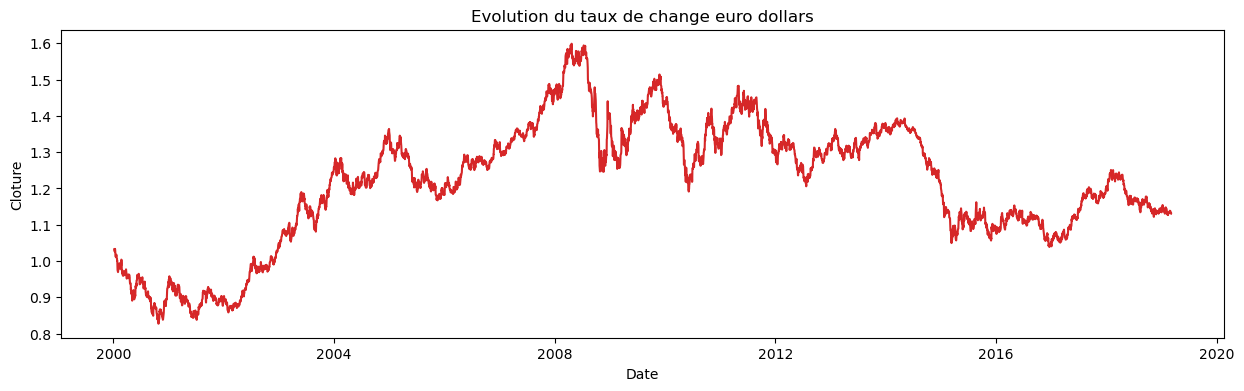

In [14]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Cloture', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Cloture'], title='Evolution du taux de change euro dollars')

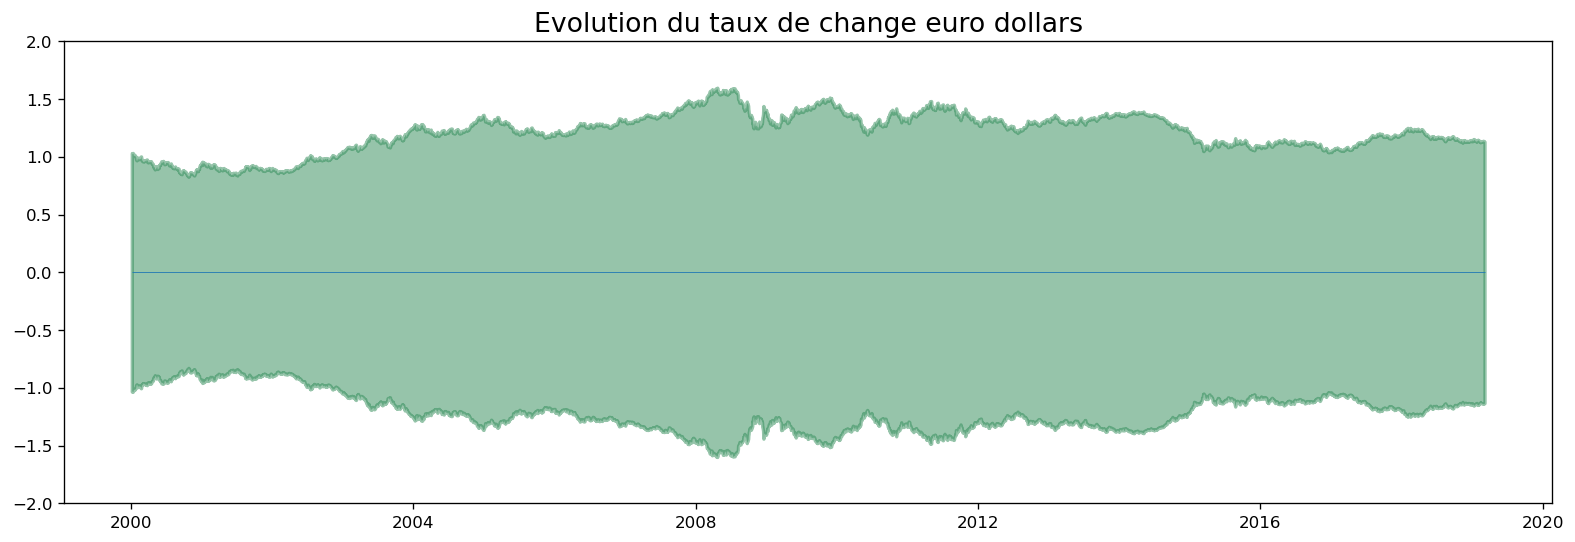

In [16]:
x = df['Date'].values
y1 = df['Cloture'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-2, 2)
plt.title('Evolution du taux de change euro dollars', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()



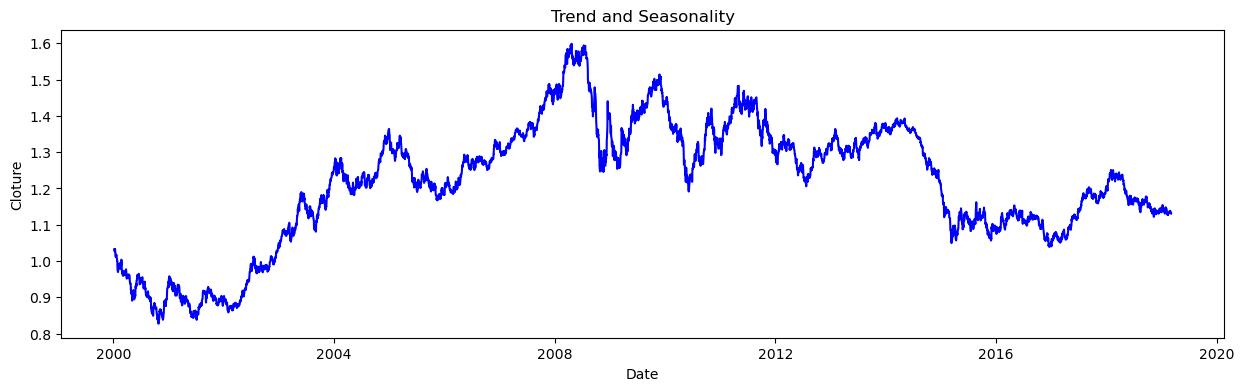

In [17]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Cloture', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Cloture'], title='Trend and Seasonality')

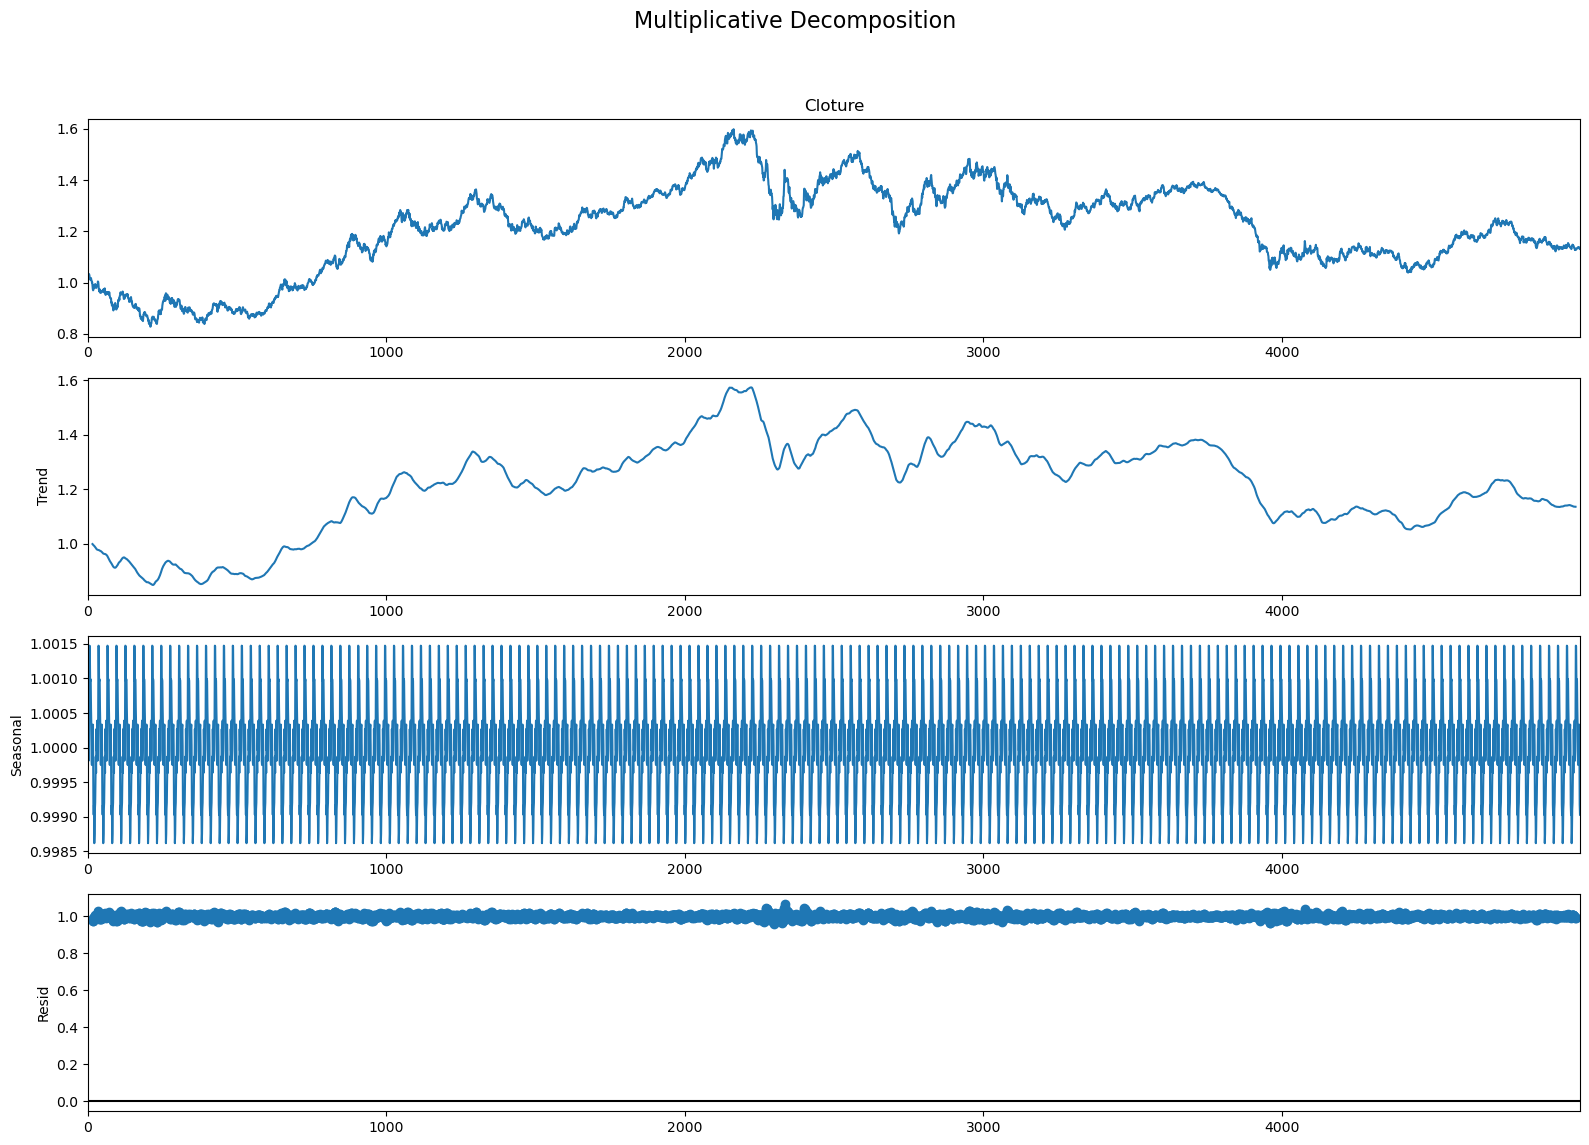

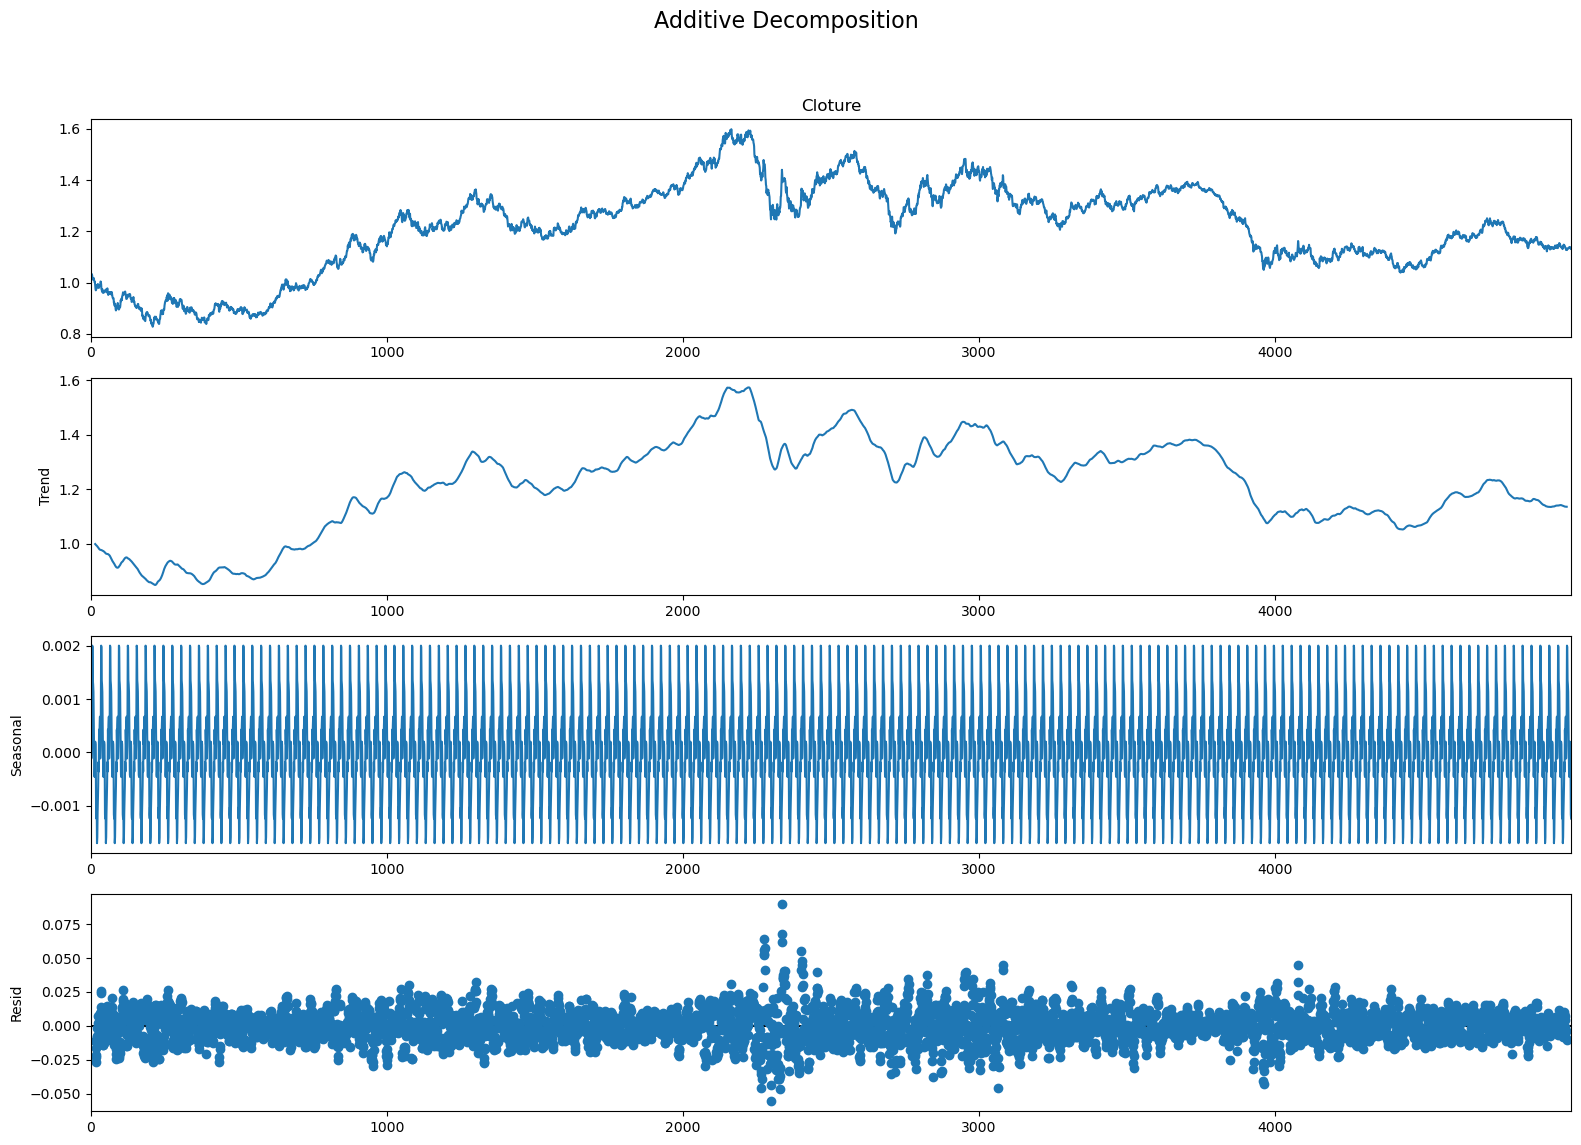

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Cloture'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Cloture'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()